# **BlackJack Karte i Spil**

In [1]:
from enum import Enum
from dataclasses import dataclass, astuple
from typing import Callable
from random import random, randint, choice
from copy import deepcopy
from tqdm import trange
from rich import print
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class CardSuit(Enum):
    """An enumeration representing card suits."""

    DIAMONDS = 0
    CLUBS = 1
    HEARTS = 2
    SPADES = 3

    def __repr__(self):
        match self:
            case CardSuit.DIAMONDS:
                return "♦"
            case CardSuit.CLUBS:
                return "♣"
            case CardSuit.HEARTS:
                return "♥"
            case CardSuit.SPADES:
                return "♠"

In [3]:
class CardValue(Enum):
    """An enumeration representing card values."""

    ACE = 1
    TWO = 2
    THREE = 3
    FOUR = 4
    FIVE = 5
    SIX = 6
    SEVEN = 7
    EIGHT = 8
    NINE = 9
    TEN = 10
    JACK = 12
    DAME = 13
    KING = 14

    def __repr__(self):
        if self == CardValue.ACE:
            return "A"
        elif self.value >= 2 and self.value <= 10:
            return str(self.value)
        elif self == CardValue.JACK:
            return "J"
        elif self == CardValue.DAME:
            return "D"
        elif self == CardValue.KING:
            return "K"

In [4]:
@dataclass
class Card:
    """A playing card."""
    value: CardValue
    suit: CardSuit

    def __repr__(self):
        return f"{repr(self.value)}{repr(self.suit)}"

In [5]:
Card(value=CardValue.ACE, suit=CardSuit.CLUBS)

A♣

In [6]:
class CardDeck:
    """A deck of cards.

    The deck contains 52 playing cards, which are shuffled and drawn consecutively.
    Once all cards have been drawn, the deck reshuffles automatically.
    """

    def reshuffle(self):
        """Refill the deck with all playing cards and reshuffle it."""
        self.cards = self.multiplicity * [Card(value=v, suit=s)
                                          for v in iter(CardValue)
                                          for s in iter(CardSuit)]
        np.random.shuffle(self.cards)

    def __init__(self, multiplicity=5):
        """Create a shuffled deck of cards.

        Args:
            multiplicity (int): The number of 52-card sets to put inside a deck.
        """
        self.multiplicity = multiplicity
        self.reshuffle()

    def draw(self):
        """Draw a card from the deck.

        Once drawn, the card is removed from the deck. Once there are no more cards inside,
        the deck will automatically refill and reshuffle.
        """
        if not self.cards:
            self.reshuffle()
        return self.cards.pop(0)

In [7]:
# These few lines simply visualize random card ordering in a deck.
deck = CardDeck()
print(", ".join([repr(c) for c in deck.cards]))

7♦, A♦, 6♠, K♥, 8♠, 5♣, 10♣, A♥, K♣, A♠, 10♠, 2♦, D♥, J♠, 5♠, J♣, 4♠, 4♥, 9♠, 2♠, 3♣, 10♦, 6♦, J♣, 7♠, 9♦, 5♣, 8♣, 
3♥, 4♥, 10♦, 9♦, 5♦, 4♦, 2♠, 2♣, 6♠, J♠, D♥, 8♥, 8♥, 4♣, 8♠, 8♣, 3♥, 10♥, 5♣, K♠, 2♦, 4♣, 10♥, 7♣, 7♦, J♠, K♠, 7♣, 
5♠, 4♥, 2♥, 5♠, D♣, A♠, J♥, A♦, 9♥, 2♣, 5♦, A♥, J♦, A♣, 3♠, 3♠, 3♣, 2♣, D♣, 10♣, J♥, 6♣, 6♠, J♠, D♠, 4♦, K♦, J♣, 
K♦, 7♦, J♣, 4♦, 5♥, 5♦, J♦, 2♠, A♦, 6♥, 9♣, D♦, 10♣, 4♥, 7♠, A♠, 9♠, 8♦, 6♦, 6♦, 6♥, 2♣, 4♠, D♥, D♣, J♥, A♣, A♥, 
7♣, 4♦, 2♥, 3♥, 9♦, K♥, 9♣, 8♠, D♠, 2♥, 9♥, 4♥, 3♠, 2♠, K♠, 3♥, 8♣, A♠, 7♠, A♣, D♦, A♣, 6♥, 2♠, A♣, 6♣, J♣, 10♦, 
6♦, 3♥, D♠, A♠, 3♣, 5♣, J♥, 2♥, 6♠, 3♦, K♣, K♥, 7♥, J♦, 5♦, 3♣, 9♠, 7♣, 5♥, K♦, D♥, 6♣, D♦, 4♣, 6♥, 8♠, D♣, 5♠, J♠,
K♣, K♠, D♣, 2♦, 8♦, J♥, 3♦, 9♦, 4♣, 10♦, D♠, 10♣, 8♦, 3♣, K♠, 10♠, K♦, 7♦, K♣, 6♥, J♦, 5♥, 9♣, 2♥, 7♥, 4♠, 7♦, 7♥, 
7♥, 6♦, A♥, K♥, 7♠, 8♦, 3♦, 5♥, 8♠, 9♠, 8♥, D♦, 2♣, 6♠, 9♣, A♥, 8♥, 7♥, D♦, 7♠, 10♣, 8♦, 5♦, K♣, 10♥, 10♥, 9♥, 9♥, 
7♣, 10♠, D♥, 5♠, 2♦, A♦, 10♥, 4♣, 8♥, 3♠, 6♣, 10♦, 5♣, 10♠, 9♥, D♠, J♦, 8♣, K♦, 3♦, 3♦, A♦, 10♠, 2♦, 4♠, 9♦, K♥, 
5♥, 9♣, 4♦, 3♠, 8♣, 9♠, 6♣, 4♠

In [8]:
@dataclass
class State:
    """The state of a Blackjack game"""
    total: int
    has_ace: bool
    dealer_total: int  # DEALER UPCARD (1–10), not total

    def __hash__(self):
        return hash(astuple(self))

    def __repr__(self):
        return repr(astuple(self))

def card_to_upcard(v: CardValue) -> int:
    """Encode dealer upcard as 2..11 (11=ACE), 10 includes face cards."""
    return 11 if v == CardValue.ACE else min(v.value, 10)

def upcard_to_cardvalue(up: int) -> CardValue:
    """Decode upcard 2..11 back to CardValue (11 -> ACE)."""
    return CardValue.ACE if up == 11 else CardValue(up)

# **BlackJack pravila**

In [9]:
def update_total(total: int, has_ace: bool, card_value: CardValue) -> tuple[int, bool]:
    """Update (a portion of) the player state by taking account a newly drawn card.

    Given the information regarding the current player state (total and ACE info), and the
    value of a newly drawn card, updates the current player state (both total and ACE info).

    The updated total returned by this function can be bigger than 21.
    The function correctly tracks statuses of ACEs (i.e. it changes values of ACEs from
    11 to 1, when appropriate, in order for the total not to excede 21), however, if
    after this the total still remains bigger than 21 the function will simply return it
    as is.

    Args:
        total (int): player total
        has_ace (bool): indicates if the player has usable ACE
        card_value (CardValue): value of the newly drawn card

    Returns:
        int: updated player total
        bool: updated info indicating if the player has a usable ACE
    """
    if card_value == CardValue.ACE:
        if total + 11 <= 21:
            # We have an ACE and the total is less than 21.
            # We can keep the ACE as 11.
            # Notice that it was impossible that we had another ACE in posession
            # before (since in that case the total would surely be bigger than 21)
            return (total+11, True)
        else:
            # The total excedes 21, and we must count the ACE as 1.
            # It is possible we had another active ACE before, if so the
            # status of this old ACE does not change.
            return (total+1, has_ace)
    else:
        total += min(card_value.value, 10)
        if total > 21:
            # The player is potentially busted.
            if has_ace:
                # If we have an active ACE, we are saved.
                # The ACE value is reduced from 11 to 1 (and the total is reduced by 10).
                # However, the cost is that we no longer have an active ACE.
                total -= 10
                return (total, False)
            else:
                # We have not active ACE, so we cannote decrease the total
                return (total, has_ace)
        # The total is less than 21, we may return the state as is.
        return (total, has_ace)

In [10]:
def random_state() -> State:
    """Generate a random state."""
    total = randint(4, 21)
    if total>= 11:
        r = random()
        if r >= 0.5:
            has_ace = True
        else:
            has_ace = False
    else:
        has_ace = False
    dealer_value = randint(2, 11)  # 11 = ACE
    return State(total, has_ace, dealer_value)


def all_states() -> list[State]:
    """Create a list of all possible Blackjack states."""
    states = []
    for total in range(4, 22):
        for dealer_value in range(2, 12):
            states.append(State(total, False, dealer_value))
            if total >= 11:
                states.append(State(total, True, dealer_value))
    return states



In [11]:
states = all_states()
len(states)

290

# **BlackJack Actions And Policies**

In [12]:
class Action(Enum):
    """Blackjack action."""
    HIT = 0
    HOLD = 1

    def __repr__(self):
        return "HIT" if self == Action.HIT else "HOLD"

def random_action() -> Action:
    """Return random action."""
    r = random()
    if r <= 0.5:
        return Action.HIT
    else:
        return Action.HOLD

In [13]:
Policy = Callable[[State], Action]

In [14]:
def random_policy(s: State) -> Action:
    return random_action()

In [15]:
def dealer_policy(s: State) -> Action:
    total, has_ace, _ = astuple(s)
    if total < 17:
        return Action.HIT
    else:
        return Action.HOLD

# **Using a Policy: Playing an Entire Turn (of a Player or a Dealer)**

In [16]:
def get_init_state(state: State | str | None, deck: CardDeck) -> State:
    report_callback = lambda txt: print(f"[bold yellow1]STATE:[/] {txt}")
    """Generate initial state."""
    if state is None:

        # Otkomentarisati report-ove zarad pravilnog ispisa
        global dealers_hidden_card
        # Player's 1st Card
        player_card = deck.draw()
        total, has_ace = update_total(0, False, player_card.value)
        #report_callback(f"Player's 1st card drawn {player_card}")

        # Dealer's 1st Card (upcard)
        dealer_card = deck.draw()
        dealer_value = card_to_upcard(dealer_card.value)
        #report_callback(f"Dealer's 1st card drawn {dealer_card}")

        # Player's 2nd Card
        player_card = deck.draw()
        total, has_ace = update_total(total, has_ace, player_card.value)
        #report_callback(f"Player's 2nd card drawn {player_card}")

        # Dealer's hidden card
        dealers_hidden_card = deck.draw()

        return State(total, has_ace, dealer_value)
    else:
        if isinstance(state, str):
            assert state == "random", f"Invalid init state specification: '{state}'"
            return random_state()
        else:
            return state

In [17]:
def get_init_action(action: Action | str | None, state: State, policy: Policy) -> Action:
    """Generate initial action."""
    if action is not None:
        if isinstance(action, str):
            assert action == "random", f"Invalid init action specification: '{action}'"
            return random_action()
        else:
            return action
    else:
        return policy(state)

In [18]:
TurnLog = list[tuple[State, Action]]
ReportCallback = Callable[[str], None]

In [19]:
def play_turn(policy: Policy,
              deck: CardDeck,
              init_state: State | None = None,
              init_action: Action | None = None,
              report_callback: ReportCallback | None = None) -> tuple[int | None, TurnLog]:

    report = lambda txt: report_callback and report_callback(txt)

    state = get_init_state(init_state, deck)
    action = get_init_action(init_action, state, policy)
    total, has_ace, dealer_value = astuple(state)

    report(f"[bold]initial state[/] {state}")
    report(f"initial total {total} with ACE {has_ace} => [bold]initial action[/] {action}")

    turn_log = [(state, action)]

    while action == Action.HIT:
        card = deck.draw()
        total, has_ace = update_total(total, has_ace, card.value)
        state = State(total, has_ace, dealer_value)

        # BUST
        if total > 21:
            report(f"turn finished - [bold]BUSTED![/] card drawn {card} => total {total}")
            return None, turn_log

        # BLACKJACK
        if total == 21:
            report(f"turn finished - [bold]BLACKJACK![/] card drawn {card} => total 21")
            turn_log.append((state, Action.HOLD))
            return 21, turn_log

        # normalna igra
        action = policy(state)
        turn_log.append((state, action))
        report(f"card drawn {card} => total {total} with ACE {has_ace} => action chosen {action}")

    report(f"turn finished with final total {total}")
    return total, turn_log


In [20]:
report_callback = lambda txt: print(f"[bold green]AGENT:[/] {txt}")
# Testing the random policy
# Initial state is chosen by drawing cards from the deck. The initial action is chosen according to the policy
play_turn(random_policy, deck, report_callback=report_callback)

AGENT: initial state (13, False, 11)

AGENT: initial total 13 with ACE False => initial action Action.HIT

AGENT: turn finished - BLACKJACK! card drawn 8♠ => total 21

(21, [((13, False, 11), HIT), ((21, False, 11), HOLD)])

In [67]:
report_callback = lambda txt: print(f"[bold green]AGENT:[/] {txt}")
# Testing the dealer's policy
# Initial state is chosen by drawing cards from the deck. The initial action is chosen according to the policy
play_turn(dealer_policy, deck, report_callback=report_callback)

AGENT: initial state (18, False, 9)

AGENT: initial total 18 with ACE False => initial action Action.HOLD

AGENT: turn finished with final total 18

(18, [((18, False, 9), HOLD)])

# **Using a Policy**

In [22]:
Experience = tuple[State, Action, float]

In [23]:
def compute_gain(rewards: list[float], gamma: float) -> float:
    """
    Compute the total gain given the list of future rewards.

    Args:
        rewards (list[float]): List of future rewards.
        gamma: discount factor

    Return:
        float: The total gain
    """
    g = 0
    w = 1
    for r in rewards:
        g += w*r
        w *= gamma
    return g

def discounted_gains(rewards: list[float], gamma) -> list[float]:
    """
    Compute list of discounted gains, given a sequence of rewards.

    Args:
        rewards (list[float]): Sequence of rewards.
        gamma: discount factor

    Return:
        list[float]: sequence of gains
    """
    gains = [compute_gain(rewards[i:], gamma) for i in range(len(rewards))]
    return gains

In [24]:
rewards = [0, 0, 0, 1]
discounted_gains(rewards, 1.0)

[1.0, 1.0, 1.0, 1]

In [25]:
discounted_gains(rewards, 0.9)

[0.7290000000000001, 0.81, 0.9, 1]

In [26]:
def build_experience(turn_log: TurnLog, result: int, gamma) -> Experience:
    """
    Compute experience from the turn log (list of state-action pairs) and the final result.

    Args:
        turn_log (TurnLog): List of state-action pairs encountered during single gameplay
        result (int): Final result of the game.

    Return:
        Experience: List of state-action-gain triples corresponding to every state-action pair encountered during a game.
    """
    rewards = [0 for _ in turn_log]
    rewards[-1] = result
    gains = discounted_gains(rewards, gamma)
    exp = [(s, a, g) for (s, a), g in zip(turn_log, gains)]
    return exp

In [27]:
def play_game(policy: Policy,
              deck: CardDeck,
              init_state: State | str | None = None,
              init_action: Action | str | None = None,
              gamma : float = 1.0,
              game_report_callback: ReportCallback | None = None,
              player_report_callback: ReportCallback | None = None,
              dealer_report_callback: ReportCallback | None = None) -> tuple[int, Experience]:
    """A single game of Blackjack, played with the given policy.

    Args:
        policy (Policy): the decision policy to use during gameplay
        init_state (State | str | None): specification of the initial state, see `get_init_state`
        init_action (Action | str | None): specification of the initial action, see `get_init_action`
        gamma (float): discount factor
        game_report_callback (ReportCallback | None): report callback used for the events generated by the game "engine"
        player_report_callback (ReportCallback | None): report callback used for the player actions
        dealer_report_callback (ReportCallback | None): report callback used for the dealer actions

    Return:
        int: The result of the game: +1 for win, 0 for draw, -1 for loss
        Experience: experience accumulated during the game
    """
    report = lambda txt: game_report_callback and game_report_callback(txt)
    # Init State
    state = get_init_state(init_state, deck)

    if state.total == 21:
      # Ako želiš da dealer ipak "proveri" blackjack:
      # dealer_upcard je state.dealer_total
      # hidden karta je dealers_hidden_card (Card)
      dealer_total, dealer_has_ace = update_total(0, False, CardValue(state.dealer_total) if state.dealer_total != 11 else CardValue.ACE)
      dealer_total, dealer_has_ace = update_total(dealer_total, dealer_has_ace, dealers_hidden_card.value)

      # Dealer blackjack => DRAW
      result = 0 if dealer_total == 21 else +1

      turn_log = [(state, Action.HOLD)]
      exp = build_experience(turn_log, result, gamma)

      if result == 1:
          report("Player BLACKJACK - WINS")
      else:
          report("Both BLACKJACK - DRAW")

      return result, exp

    action = get_init_action(init_action, state, policy)
    player_total, turn_log = play_turn(policy, deck, init_state=state, init_action=action, report_callback=player_report_callback)

    if player_total is not None:
        # Dealer's Turn Report and Calculation
        dealer_up = upcard_to_cardvalue(state.dealer_total)
        dealer_total, dealer_has_ace = update_total(0, False, dealer_up)

        # Displaying Hidden Card
        dealer_card = dealers_hidden_card
        dealer_total, dealer_has_ace = update_total(dealer_total, dealer_has_ace, dealer_card.value)
        report(f"Dealer's Hidden Card {dealer_card}")

        dealer_state = State(dealer_total, dealer_has_ace, 0)
        dealer_total, _ = play_turn(dealer_policy, deck, init_state=dealer_state, report_callback=dealer_report_callback)
        if dealer_total is not None:
            if player_total > dealer_total:
                result = +1
            elif player_total == dealer_total:
                result = 0
            else:
                result = -1
        else:
            result = +1
    else:
        result = -1
    exp = build_experience(turn_log, result, gamma)
    if result == 1:
        report("Player WINS")
    elif result == 0:
        report("Game DRAW")
    else:
        report("Player LOSES")
    return result, exp

In [28]:
player_report_callback = lambda txt: print(f"[bold blue]PLAYER:[/] {txt}")
dealer_report_callback = lambda txt: print(f"[bold cyan]DEALER:[/] {txt}")
game_report_callback = lambda txt: print(f"[bold red]{txt}[/]")

callbacks = {
    "player_report_callback": player_report_callback,
    "dealer_report_callback": dealer_report_callback,
    "game_report_callback": game_report_callback
}

In [29]:
# Playing the game using the random policy
play_game(dealer_policy, deck, **callbacks)

PLAYER: initial state (20, False, 2)

PLAYER: initial total 20 with ACE False => initial action Action.HOLD

PLAYER: turn finished with final total 20

Dealer's Hidden Card J♠

DEALER: initial state (12, False, 0)

DEALER: initial total 12 with ACE False => initial action Action.HIT

DEALER: card drawn 5♠ => total 17 with ACE False => action chosen Action.HOLD

DEALER: turn finished with final total 17

Player WINS

(1, [((20, False, 2), HOLD, 1)])

In [30]:
@dataclass
class PolicyTestingResult:
    games_no: int
    score: int
    wins: float
    draws: float
    losses: float

    def loss_per_game(self):
        """Average loss per game."""
        return self.score/self.games_no

    def __repr__(self):
        return f"total score={self.score}/{self.games_no} games ({self.loss_per_game():.4f} per game) :: W {self.wins*100:.2f}% | D {self.draws*100:.2f}% | L {self.losses*100:.2f}%"

In [31]:
def apply_policy(policy: Policy, deck: CardDeck, games_no=1000, gamma=1, random_init_state=False, random_init_action=False) -> tuple[PolicyTestingResult, Experience]:
    wins, losses, draws, score = 0, 0, 0, 0
    init_action = "random" if random_init_action else None
    init_state = "random" if random_init_state else None
    experience = []
    for k in range(games_no):
        res, exp = play_game(policy, deck, gamma=gamma, init_state=init_state, init_action=init_action)
        score += res
        experience.append(exp)
        if res == 1:
            wins += 1
        elif res == 0:
            draws += 1
        else:
            losses += 1
    return PolicyTestingResult(games_no, score, wins/games_no, draws/games_no, losses/games_no), experience

In [32]:
res = apply_policy(random_policy, deck, 10, gamma=0.9)
print(res)

(
    total score=-3/10 games (-0.3000 per game) :: W 30.00% | D 10.00% | L 60.00%,
    [
        [((14, False, 4), HOLD, -1)],
        [((20, False, 6), HOLD, 1)],
        [((8, False, 8), HOLD, 1)],
        [((13, False, 5), HOLD, 1)],
        [((18, False, 8), HOLD, -1)],
        [((18, False, 3), HOLD, 0)],
        [((12, False, 4), HOLD, -1)],
        [((17, False, 10), HOLD, -1)],
        [((12, False, 5), HOLD, -1)],
        [((14, False, 2), HOLD, -1)]
    ]
)

# **Comparative performance**

In [33]:
res, _ = apply_policy(random_policy, deck, 10000)
print(res)

total score=-3304/10000 games (-0.3304 per game) :: W 31.31% | D 4.34% | L 64.35%

In [34]:
res, _ = apply_policy(dealer_policy, deck, 10000)
print(res)

total score=-814/10000 games (-0.0814 per game) :: W 40.76% | D 10.34% | L 48.90%

# **Decision policy**

In [35]:
QDict = dict[State, tuple[float, float]]

def create_greedy_policy(q_dict: QDict) -> Policy:
    """Create a greedy policy function based on the given Q-dictionary."""
    no_actions = len(list(Action))

    def policy(s: State):
        q_values = q_dict.get(s, None)
        if q_values is not None:
            assert len(q_values) == no_actions, f"Invalid Q-dict for state {s}."
            if any([v is None for v in q_values]):
                return random_policy(s)
            else:
                ndx = np.argmax(q_values)
                return Action(ndx)
        else:
            return random_policy(s)

    return policy

In [36]:
GainsDict = dict[State, tuple[list[float], list[float]]]

def create_gains_dict(experience):
    gains_dict = dict()

    for episode in experience:
        for s, a, g in episode:
            action_gains = gains_dict.get(s, ([], []))
            action_gains[a.value].append(g)
            gains_dict[s] = action_gains

    return gains_dict

In [37]:
def evaluate_Q(experience: Experience) -> QDict:
    """Evaluate Q-function based on the given experience."""
    gains_dict = create_gains_dict(experience)

    q_dict = dict()
    for s, (gains_HIT, gains_HOLD) in gains_dict.items():
        q_value_HIT = np.mean(gains_HIT) if gains_HIT else None
        q_value_HOLD = np.mean(gains_HOLD) if gains_HOLD else None
        q_dict[s] = (q_value_HIT, q_value_HOLD)
    return q_dict

In [38]:
# Iteration No #1
q_dict = dict()
policy = create_greedy_policy(q_dict)
res, exp = apply_policy(policy, deck, 10000, gamma=0.9, random_init_state=True, random_init_action=True)
print(res)

total score=-2431/10000 games (-0.2431 per game) :: W 36.05% | D 3.59% | L 60.36%

In [39]:
# Iteration No #2
q_dict = evaluate_Q(exp)
policy = create_greedy_policy(q_dict)
res, exp = apply_policy(policy, deck, 10000, gamma=0.9, random_init_state=True, random_init_action=True)
print(res)

total score=-1322/10000 games (-0.1322 per game) :: W 41.17% | D 4.44% | L 54.39%

100%|██████████| 40/40 [00:31<00:00,  1.25it/s]


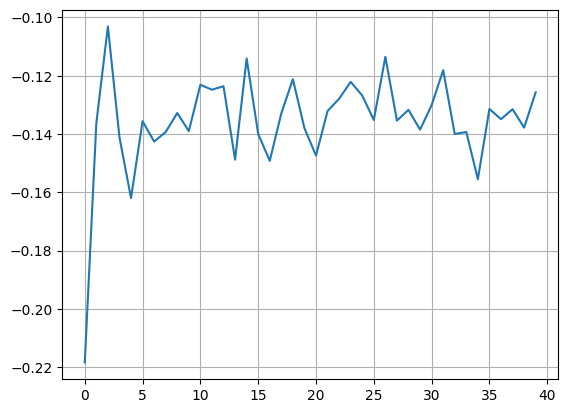

In [40]:
q_dict = dict()
results = []
for k in trange(40):
    policy = create_greedy_policy(q_dict)
    res, exp = apply_policy(policy, deck, 10000, gamma=0.9, random_init_action=True, random_init_state=True)
    results.append(res.loss_per_game())
    q_dict = evaluate_Q(exp)
plt.plot(results)
plt.grid(True)

In [41]:
res, _ = apply_policy(create_greedy_policy(q_dict), deck, 10000)
print(res)

total score=-978/10000 games (-0.0978 per game) :: W 41.08% | D 8.06% | L 50.86%

In [42]:
res, _ = apply_policy(dealer_policy, deck, 10000)
print(res)

total score=-786/10000 games (-0.0786 per game) :: W 41.01% | D 10.12% | L 48.87%

100%|██████████| 40/40 [00:46<00:00,  1.16s/it]


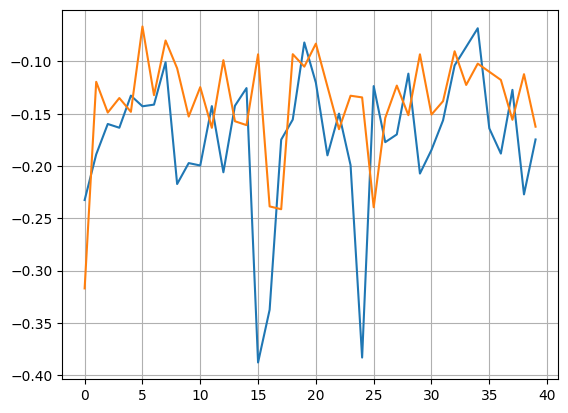

In [43]:
q_dict = dict()
results = []
results_val = []
best_val_loss = None
q_dict_best = None
for k in trange(40):
    policy = create_greedy_policy(q_dict)
    res, exp = apply_policy(policy, deck, 10000, gamma=0.9, random_init_action=True, random_init_state=True)
    res_val, _ = apply_policy(policy, deck, 10000)
    results.append(res.loss_per_game())
    results_val.append(res_val.loss_per_game())
    if not best_val_loss or best_val_loss <  res_val.loss_per_game():
        best_val_loss = res_val.loss_per_game()
        q_dict_best = deepcopy(q_dict)
    q_dict = evaluate_Q(exp)
plt.plot(results)
plt.plot(results_val)
plt.grid(True)

Posto se radi o Naivnom Monte Karlu koji akumulira procene kroz iteracije ovakav odziv ima smisla

In [44]:
best_policy = create_greedy_policy(q_dict_best)

In [45]:
res, _ = apply_policy(best_policy, deck, 10000)
print(res)

total score=-815/10000 games (-0.0815 per game) :: W 41.95% | D 7.95% | L 50.10%

# **Visualizing the best policy**

In [46]:
def visualize_policy(policy):
    """Visualize the policy.

    The policy will be visualized using a colored greed.
    The horizontal axis will correspond to the player total and the vertical axis to the
    dealer's total.

    If a cell is colored in red, it means that the action is HIT, regardless of existence of usable ACE.
    If a cell is colored in blue, it means HOLD, regardless of existence of usable ACE.
    Green cells are those in which HIT will be played only if there is a usable ACE.
    Black cells are those in which HIT will be played only if there is no usable ACE.

    Since the last case (play HIT if there is no usable ACE, and HOLD otherwise) seems counterintutive,
    the color black is selected to distinguish it from other states.
    """
    player_values = list(range(4, 21))
    dealer_values = list(range(2, 12))
    board = np.ones(shape=(len(dealer_values), len(player_values), 3), dtype=np.uint8)
    for r, dv in enumerate(dealer_values):
        for c, pv in enumerate(player_values):
            if pv < 11:
                action_t = policy(State(pv, False, dv)) == Action.HIT
                if action_t:
                    board[r, c, :] = (255, 0, 0)
                else:
                    board[r, c, :] = (0, 0, 255)
            else:
                action_t = policy(State(pv, True, dv)) == Action.HIT
                action_f = policy(State(pv, False, dv)) == Action.HIT
                if action_t and action_f:
                    board[r, c, :] = (255, 0, 0)
                elif action_t and not action_f:
                    board[r, c, :] = (0, 255, 0)
                elif not action_t and not action_f:
                    board[r, c, :] = (0, 0, 255)
                else:
                    board[r, c, :] = (0, 0, 0)
    plt.imshow(board, extent=[4, 21, 12, 2], aspect="auto")
    plt.xticks(np.arange(4.5, 21.5, 1), np.arange(4, 21, 1))
    plt.yticks(np.arange(2.5, 12.5, 1), np.arange(2, 12, 1))
    plt.xlabel("player total")
    plt.ylabel("dealer total")

# **Incremental learning**

In [47]:
def update_q_value(current: float, target: float, alpha: float) -> float:
    """Update the given current estimate given the new target.

    Args:
        current (float): existing estimate
        target (float): the given target
        alpha (float): learning rate

    Return:
        float: the new, updated estimate
    """
    if current is not None and target is not None:
        return current + alpha * (target - current)
    elif current is None:
        return target
    elif target is None:
        return current
    else:
        return None

In [48]:
def update_Q(q_dict: QDict, experience: Experience, alpha=0.1):
    """Update Q-function based on the given experience."""
    gains_dict = create_gains_dict(experience)

    for s, (gains_HIT, gains_HOLD) in gains_dict.items():
        target_value_HIT = np.mean(gains_HIT) if gains_HIT else None
        target_value_HOLD = np.mean(gains_HOLD) if gains_HOLD else None
        old_value_HIT, old_value_HOLD = q_dict.get(s, (None, None))
        q_value_HIT = update_q_value(old_value_HIT, target_value_HIT, alpha)
        q_value_HOLD = update_q_value(old_value_HOLD, target_value_HOLD, alpha)
        q_dict[s] = (q_value_HIT, q_value_HOLD)

    return q_dict

100%|██████████| 40/40 [00:47<00:00,  1.18s/it]


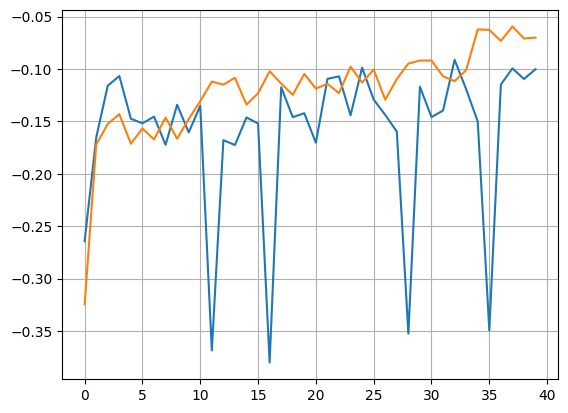

In [49]:
q_dict = dict()
results = []
results_val = []
best_val_loss = None
q_dict_best = None
alpha = 0.01
for k in trange(40):
    policy = create_greedy_policy(q_dict)
    res, exp = apply_policy(policy, deck, 10000, gamma=0.9, random_init_action=True, random_init_state=True)
    res_val, _ = apply_policy(policy, deck, 10000)
    results.append(res.loss_per_game())
    results_val.append(res_val.loss_per_game())
    if not best_val_loss or best_val_loss <  res_val.loss_per_game():
        best_val_loss = res_val.loss_per_game()
        q_dict_best = deepcopy(q_dict)
    update_Q(q_dict, exp, alpha)
plt.plot(results)
plt.plot(results_val)
plt.grid(True)

Grafici od gore sustiniski nisu bitni za alternativni zadatak, meni su sluzili kao smernica samo pa sam ih ostavio.

## TD Metode - Pravi deo zadatka


In [50]:
def epsilon_greedy(Q, s, eps):
    # ako stanje nije viđeno
    if s not in Q:
        return choice(list(Action))

    if random() < eps:
        return choice(list(Action))

    # greedy sa random tie-break
    q_hit = Q[s][Action.HIT]
    q_hold = Q[s][Action.HOLD]

    if q_hit > q_hold:
        return Action.HIT
    elif q_hold > q_hit:
        return Action.HOLD
    else:
        return choice(list(Action))

In [51]:
def draw_card_value():
    """
    Infinite deck: i.i.d. izvlačenje vrednosti karte.
    Face karte = 10, As = 1 (obrađuje se u update_total).
    """
    return choice([
        CardValue.ACE,
        CardValue.TWO,
        CardValue.THREE,
        CardValue.FOUR,
        CardValue.FIVE,
        CardValue.SIX,
        CardValue.SEVEN,
        CardValue.EIGHT,
        CardValue.NINE,
        CardValue.TEN,
        CardValue.JACK,
        CardValue.DAME,
        CardValue.KING,
    ])
# Neophodna funkcija za simulaciju prelaza kod SARSA i Q_learninga
def one_step_sim(s: State, a: Action, deck=None):
    total, has_ace, dealer_up = astuple(s)

    # HIT
    if a == Action.HIT:
        card = draw_card_value()
        total, has_ace = update_total(total, has_ace, card)

        if total > 21:
            return None, -1.0, True

        # nema nagrade dok ne HOLD-uješ
        return State(total, has_ace, dealer_up), 0.0, False

    # HOLD
    dealer_total, dealer_has_ace = update_total(
        0, False,
        upcard_to_cardvalue(dealer_up)
    )

    # dealer stoji na 17
    while dealer_total < 17 or (dealer_total == 17 and dealer_has_ace):
        card = draw_card_value()
        dealer_total, dealer_has_ace = update_total(dealer_total, dealer_has_ace, card)

    if dealer_total > 21 or total > dealer_total:
        return None, 1.0, True
    if total == dealer_total:
        return None, 0.0, True
    return None, -1.0, True
# Zarad ravnomerne konvergencije
def random_init_state():
    total = randint(4, 21)
    has_ace = total >= 11 and random() < 0.5
    dealer = randint(2, 11)
    return State(total, has_ace, dealer)


To su sve helper funkcije koje su potrebne za ucenje Q_learninga, sledeci kod je poziv svega navedenog

In [52]:
def q_learning_blackjack(
    deck: CardDeck,
    episodes: int,
    alpha: float = 0.05,
    gamma: float = 1.0,
):
    """
    Čista Q-learning implementacija po pseudokodu
    """
    Q = {}

    for ep in range(episodes):
        #decay
        eps = max(0.05, 1.0 * (0.999995 ** ep))

        # random state za ravnomerno ucenje
        s = random_init_state()

        # inicijalizuj Q
        if s not in Q:
            Q[s] = {Action.HIT: 0.0, Action.HOLD: 0.0}

        a = epsilon_greedy(Q, s, eps)

        while True:
            s_next, r, done = one_step_sim(s, a, deck)

            q_sa = Q[s][a]

            if done or s_next is None:
                target = r
            else:
                if s_next not in Q:
                    Q[s_next] = {Action.HIT: 0.0, Action.HOLD: 0.0}

                target = r + gamma * max(Q[s_next].values())

            # Q update
            Q[s][a] = q_sa + alpha * (target - q_sa)

            if done:
                break

            s = s_next
            a = epsilon_greedy(Q, s, eps)

    return Q


Posto se u odredjenim stanjima pojavljuje sum i netacno ucenje odredjenih stanja u jednoj simulaciji a tacno u drugoj, napravljen je majorty vote koji samo glasa za finalnu politiku akciju u stanjima na osnovu toga koju je akciju najvise video (za to stanje).

In [53]:
def greedy_policy_from_Q(Q):
    def policy(s: State):
        if s not in Q:
            return choice(list(Action))
        q_hit = Q[s][Action.HIT]
        q_hold = Q[s][Action.HOLD]

        if q_hit > q_hold:
            return Action.HIT
        elif q_hold > q_hit:
            return Action.HOLD
        else:
            return choice(list(Action))
    return policy


100%|██████████| 50/50 [01:05<00:00,  1.30s/it]


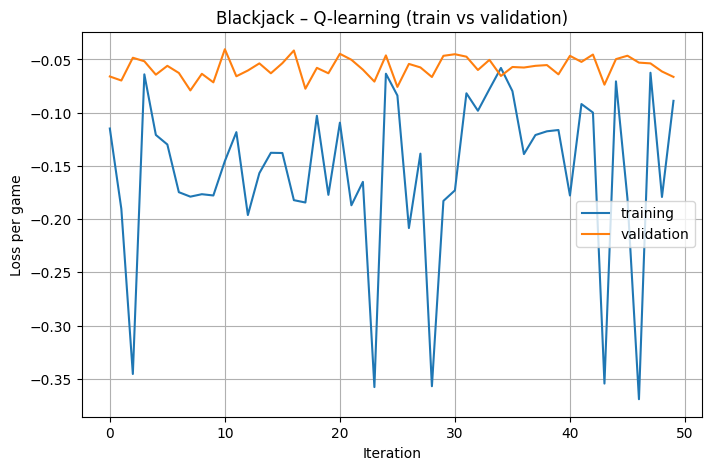

In [54]:
def random_state() -> State:
    """Generate a random state."""
    total = randint(4, 21)
    if total>= 11:
        r = random()
        if r >= 0.5:
            has_ace = True
        else:
            has_ace = False
    else:
        has_ace = False
    dealer_value = randint(2, 11)  # 11 = ACE
    return State(total, has_ace, dealer_value)

# Brzinski import
from copy import deepcopy
from tqdm import trange
import matplotlib.pyplot as plt

alpha = 0.05
gamma = 0.9
iters = 50
episodes_per_iter = 5_000
eval_games = 10_000

Q = {}

train_losses = []
val_losses = []

best_val = None
Q_best = None

for k in trange(iters):

    for ep in range(episodes_per_iter):
        # Decay
        eps = max(0.05, 1.0 * (0.999995 ** (k * episodes_per_iter + ep)))

        # Init
        s = random_init_state()
        Q.setdefault(s, {Action.HIT: 0.0, Action.HOLD: 0.0})

        a = epsilon_greedy(Q, s, eps)

        while True:
            s_next, r, done = one_step_sim(s, a)

            q_sa = Q[s][a]

            if done or s_next is None:
                target = r
            else:
                Q.setdefault(
                    s_next,
                    {Action.HIT: 0.0, Action.HOLD: 0.0}
                )
                target = r + gamma * max(Q[s_next].values())


            Q[s][a] = q_sa + alpha * (target - q_sa)

            if done:
                break

            s = s_next
            a = epsilon_greedy(Q, s, eps)

    policy = greedy_policy_from_Q(Q)

    res_train, _ = apply_policy(
        policy,
        deck,
        eval_games,
        random_init_state=True,
        random_init_action=True
    )

    res_val, _ = apply_policy(
        policy,
        deck,
        eval_games
    )

    train_loss = res_train.loss_per_game()
    val_loss = res_val.loss_per_game()

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    if best_val is None or val_loss > best_val:
        best_val = val_loss
        Q_best = deepcopy(Q)

plt.figure(figsize=(8, 5))
plt.plot(train_losses, label="training")
plt.plot(val_losses, label="validation")
plt.xlabel("Iteration")
plt.ylabel("Loss per game")
plt.title("Blackjack – Q-learning (train vs validation)")
plt.legend()
plt.grid(True)
plt.show()


Gornji Grafik prikazuje razliku izmedju ucenja i primene (validacije). Imamo jake skokove jer ne znamo na dobar nacin da sracunamo dugorocnu dobit i to je okej. Kod validacije dolazi do konvergiranja.

In [55]:
def train_multiple_policies(
    n_runs=5,
    episodes=200_000
):
    policies = []

    for i in range(n_runs):
        print(f"Training run {i+1}/{n_runs}")
        Q = q_learning_blackjack(
            deck=CardDeck(),
            episodes=episodes,
            alpha=0.05,
            gamma=0.9
        )
        # koristimo greedy politiku nakon sto smo istrenirali
        policies.append(greedy_policy_from_Q(Q))

    return policies

In [56]:
policies = train_multiple_policies(n_runs=50, episodes=200_000)

Training run 1/50

Training run 2/50

Training run 3/50

Training run 4/50

Training run 5/50

Training run 6/50

Training run 7/50

Training run 8/50

Training run 9/50

Training run 10/50

Training run 11/50

Training run 12/50

Training run 13/50

Training run 14/50

Training run 15/50

Training run 16/50

Training run 17/50

Training run 18/50

Training run 19/50

Training run 20/50

Training run 21/50

Training run 22/50

Training run 23/50

Training run 24/50

Training run 25/50

Training run 26/50

Training run 27/50

Training run 28/50

Training run 29/50

Training run 30/50

Training run 31/50

Training run 32/50

Training run 33/50

Training run 34/50

Training run 35/50

Training run 36/50

Training run 37/50

Training run 38/50

Training run 39/50

Training run 40/50

Training run 41/50

Training run 42/50

Training run 43/50

Training run 44/50

Training run 45/50

Training run 46/50

Training run 47/50

Training run 48/50

Training run 49/50

Training run 50/50

In [57]:
def majority_vote_policy(policies):
    def policy(s: State):
        actions = [pi(s) for pi in policies]
        counts = Counter(actions)

        # ako postoji jasan pobednik
        if counts[Action.HIT] != counts[Action.HOLD]:
            return counts.most_common(1)[0][0]

        # tie-break (deterministicki)
        return Action.HOLD

    return policy

final_policy = majority_vote_policy(policies)

Prikaz politike preko mayority votea je :

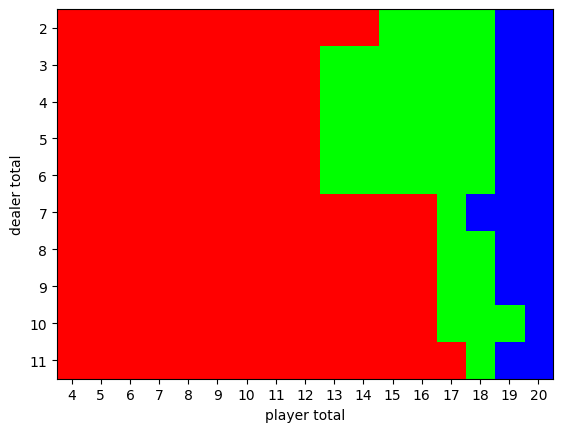

In [58]:
visualize_policy(final_policy)

In [59]:
def greedy_policy_from_Q(Q):
    def policy(s: State):
        if s not in Q:
            return choice(list(Action))

        q_hit = Q[s][Action.HIT]
        q_hold = Q[s][Action.HOLD]

        if q_hit > q_hold:
            return Action.HIT
        elif q_hold > q_hit:
            return Action.HOLD
        else:
            return choice(list(Action))

    return policy

def fast_random_init_state():
    total = randint(4, 21)
    has_ace = total >= 11 and random() < 0.5
    dealer = randint(2, 11)
    return State(total, has_ace, dealer)

def sarsa_blackjack(
    episodes: int,
    alpha: float = 0.05,
    gamma: float = 0.9,
    eps_start: float = 1.0,
    eps_end: float = 0.05,
):
    Q = {}
    returns = []

    for ep in range(episodes):

        eps = max(eps_end, eps_start * (0.999995 ** ep))

        # init state
        s = fast_random_init_state()
        Q.setdefault(s, {Action.HIT: 0.0, Action.HOLD: 0.0})

        # init action
        a = epsilon_greedy(Q, s, eps)
        G = 0
        while True:

            s_next, r, done = one_step_sim(s, a)
            G += r
            q_sa = Q[s][a]

            if done or s_next is None:
                Q[s][a] = q_sa + alpha * (r - q_sa)
                break

            Q.setdefault(s_next, {Action.HIT: 0.0, Action.HOLD: 0.0})
            a_next = epsilon_greedy(Q, s_next, eps)

            # SARSA update
            Q[s][a] = q_sa + alpha * (r + gamma * Q[s_next][a_next] - q_sa)

            # pomeri se napred
            s = s_next
            a = a_next

        returns.append(G)
    return Q, returns

def train_multiple_policies(
    n_runs=5,
    episodes=200_000
):
    policies = []

    for i in range(n_runs):
        print(f"Training run {i+1}/{n_runs}")
        Q, _ = sarsa_blackjack(
            episodes=episodes,
            alpha=0.05,
            gamma=1
        )
        policies.append(greedy_policy_from_Q(Q))

    return policies


100%|██████████| 40/40 [00:42<00:00,  1.06s/it]


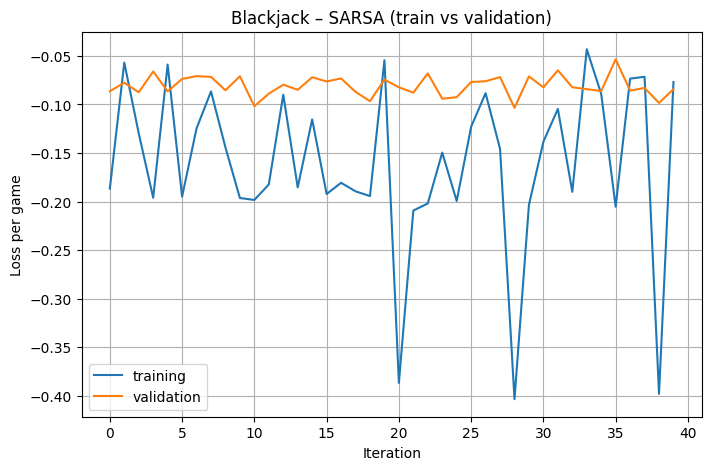

In [60]:
# Q_sarsa, sarsa_returns = sarsa_blackjack(episodes=10000, alpha=0.05, gamma=0.9)

from copy import deepcopy
from tqdm import trange
import matplotlib.pyplot as plt

alpha = 0.05
gamma = 0.9
iters = 40
episodes_per_iter = 5_000
eval_games = 10_000

train_losses = []
val_losses = []

best_val = None
Q_best = None


Q = {}

for k in trange(iters):


    Q_block, _ = sarsa_blackjack(
        episodes=episodes_per_iter,
        alpha=alpha,
        gamma=gamma
    )

    Q = Q_block


    policy = greedy_policy_from_Q(Q)


    res_train, _ = apply_policy(
        policy,
        deck,
        eval_games,
        random_init_state=True,
        random_init_action=True
    )


    res_val, _ = apply_policy(
        policy,
        deck,
        eval_games
    )

    train_loss = res_train.loss_per_game()
    val_loss = res_val.loss_per_game()

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    if best_val is None or val_loss > best_val:
        best_val = val_loss
        Q_best = deepcopy(Q)

plt.figure(figsize=(8, 5))
plt.plot(train_losses, label="training")
plt.plot(val_losses, label="validation")
plt.xlabel("Iteration")
plt.ylabel("Loss per game")
plt.title("Blackjack – SARSA (train vs validation)")
plt.legend()
plt.grid(True)
plt.show()


Isto kao i kod Q learninga na treningu posto "lupetamo" imamo jake skokove. Međutim kada predjemo na validaciju tada prosecna dobit konvergira. Sustinski ovo je snapshot dobiti na osnovu politike na svakih 5000 iteracija.

In [61]:
policies = train_multiple_policies(n_runs=50, episodes=200_000)

Training run 1/50

Training run 2/50

Training run 3/50

Training run 4/50

Training run 5/50

Training run 6/50

Training run 7/50

Training run 8/50

Training run 9/50

Training run 10/50

Training run 11/50

Training run 12/50

Training run 13/50

Training run 14/50

Training run 15/50

Training run 16/50

Training run 17/50

Training run 18/50

Training run 19/50

Training run 20/50

Training run 21/50

Training run 22/50

Training run 23/50

Training run 24/50

Training run 25/50

Training run 26/50

Training run 27/50

Training run 28/50

Training run 29/50

Training run 30/50

Training run 31/50

Training run 32/50

Training run 33/50

Training run 34/50

Training run 35/50

Training run 36/50

Training run 37/50

Training run 38/50

Training run 39/50

Training run 40/50

Training run 41/50

Training run 42/50

Training run 43/50

Training run 44/50

Training run 45/50

Training run 46/50

Training run 47/50

Training run 48/50

Training run 49/50

Training run 50/50

In [62]:
def majority_vote_policy(policies):
    def policy(s: State):
        actions = [pi(s) for pi in policies]
        counts = Counter(actions)

        # ako postoji jasan pobednik
        if counts[Action.HIT] != counts[Action.HOLD]:
            return counts.most_common(1)[0][0]

        # tie-break (deterministički)
        return Action.HOLD

    return policy

final_policy = majority_vote_policy(policies)

In [63]:
print(apply_policy(final_policy, CardDeck(), 100_000)[0])

total score=-4295/100000 games (-0.0430 per game) :: W 43.38% | D 8.95% | L 47.67%

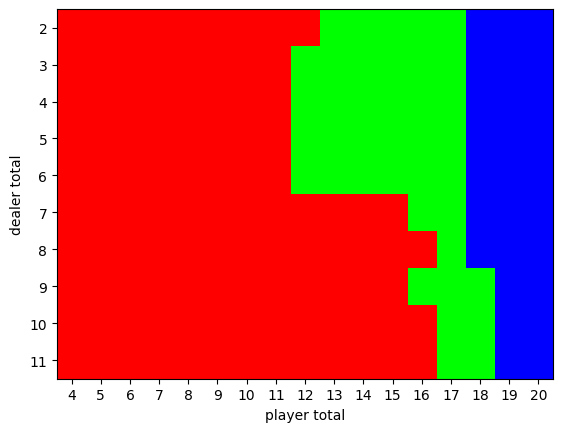

In [64]:
visualize_policy(final_policy)

Vidimo da kojom god metodom ili politikom se vodimo, ostacemo dugorocno bez novca ;(